# Numpy Introduction

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

## Numpy Installation and import
Numpy is an easy package to install. Open up your terminal program (for Mac users) or command line (for PC users) and install it using either of the following commands:

pip3 install numpy

Alternatively, if you're currently viewing this article in a Jupyter notebook you can run this cell:

In [3]:
!pip3 install numpy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from __future__ import print_function
import numpy as np


### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [9]:
a = np.array([1, 2, 3])  # Create a rank 1 array
type(a)
a.shape, a[0], a[1]
a[0] = 5                 # Change an element of the array
a                 

array([5, 2, 3])

In [8]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [12]:
b.shape                   
print(b[0, 0], b[0, 1], b[1, 0])

1 2 4


Numpy also provides many functions to create arrays:

In [13]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [14]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [15]:
c = np.full((2,2), 7) # Create a constant array
print(c )

[[7 7]
 [7 7]]


In [16]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [17]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.5060596  0.46714099]
 [0.5575111  0.78974473]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [18]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [19]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [20]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [21]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [22]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [23]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [24]:
# When using integer array indexing, you can reuse the same
# element from the source array:
a[[0, 0], [1, 1]]

# Equivalent to the previous integer array indexing example
np.array([a[0, 1], a[0, 1]])

array([2, 2])

One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [25]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [26]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
a[np.arange(4), b]  # Prints "[ 1  6  7 11]"

array([ 1,  6,  7, 11])

In [27]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
a

array([[11,  2,  3],
       [ 4,  5, 16],
       [17,  8,  9],
       [10, 21, 12]])

Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [28]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

bool_idx

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [29]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
a[bool_idx]

# We can do all of the above in a single concise statement:
a[a > 2]

array([3, 4, 5, 6])

For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [30]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [31]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
x + y
np.add(x, y)

array([[ 6.,  8.],
       [10., 12.]])

In [32]:
# Elementwise difference; both produce the array
x - y
np.subtract(x, y)

array([[-4., -4.],
       [-4., -4.]])

In [33]:
# Elementwise product; both produce the array
x * y
np.multiply(x, y)

array([[ 5., 12.],
       [21., 32.]])

In [34]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
x / y
np.divide(x, y)

array([[0.2       , 0.33333333],
       [0.42857143, 0.5       ]])

In [35]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
np.sqrt(x)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [36]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
v.dot(w)
np.dot(v, w)

219

In [37]:
# Matrix / vector product; both produce the rank 1 array [29 67]
x.dot(v)
np.dot(x, v)

array([29, 67])

In [38]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
x.dot(y)
np.dot(x, y)

array([[19, 22],
       [43, 50]])

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [39]:
x = np.array([[1,2],[3,4]])

np.sum(x)  # Compute sum of all elements; prints "10"
np.sum(x, axis=0)  # Compute sum of each column; prints "[4 6]"
np.sum(x, axis=1)  # Compute sum of each row; prints "[3 7]"

array([3, 7])

You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [40]:
x
x.T

array([[1, 3],
       [2, 4]])

In [41]:
v = np.array([[1,2,3]])
v 
v.T

array([[1],
       [2],
       [3]])

### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [42]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [43]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [44]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [45]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

(x.T + w).T

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [46]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [47]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [11]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [12]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
  9.   9.1  9.2  9.3  9.4]
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87

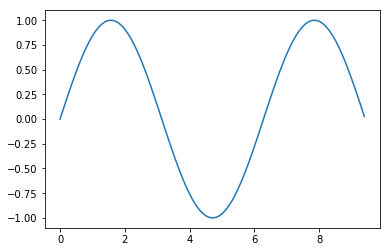

In [18]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

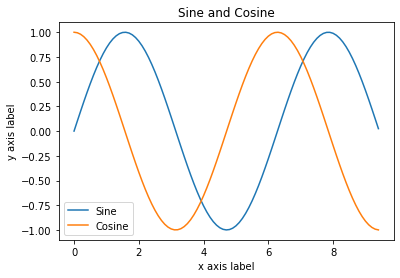

In [65]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Scatter 

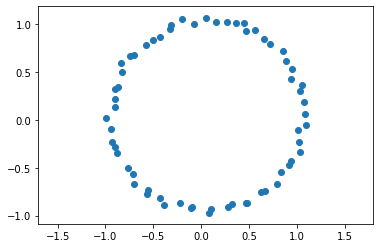

In [73]:
# Many times we need to represent datapoints hence we use plt.scatter 

# Example shows the plotting of a circle with some error (0-0.1)
ind = np.arange(0,2*np.pi,0.1)
x = np.sin(ind) + 0.1*np.random.random(ind.shape[0])
y = np.cos(ind) + + 0.1*np.random.random(ind.shape[0])

# Pass the x and y co-ordinates respectively
plt.scatter(y,x)
plt.axis("equal")
plt.show()

### Bar plot 

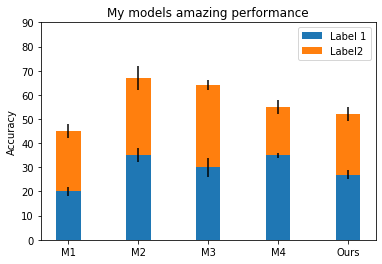

In [71]:
# Bar plots

N = 5
A = (20, 35, 30, 35, 27)
B = (25, 32, 34, 20, 25)
A_std = (2, 3, 4, 1, 2)
B_std = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, A, width, yerr=A_std)
p2 = plt.bar(ind, B, width,
             bottom=A, yerr=B_std)

plt.ylabel('Accuracy')
plt.title('My models amazing performance')
plt.xticks(ind, ('M1', 'M2', 'M3', 'M4', 'Ours'))
plt.yticks(np.arange(0, 100, 10))
plt.legend((p1[0], p2[0]), ('Label 1', 'Label2'))

plt.show()

### Subplots 

Figure is a window in which all the plots are shown. 


You can plot different things in the same figure using the subplot function. Here is an example:

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


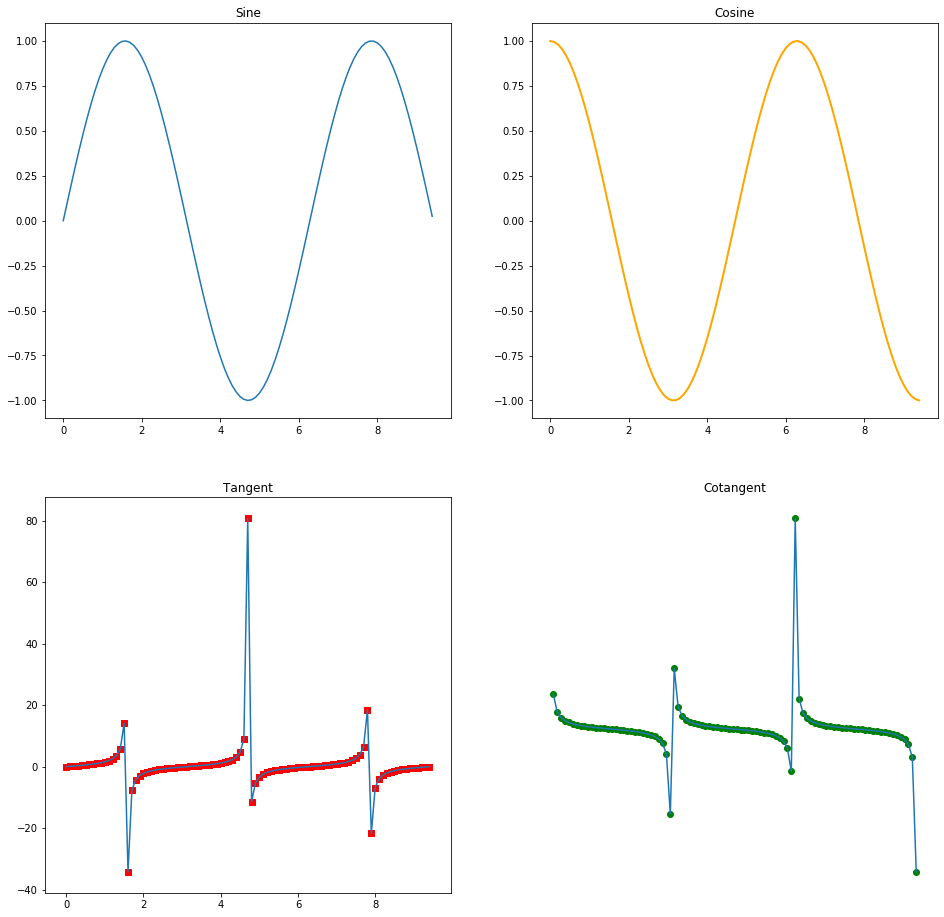

In [80]:
# Define our figure. Figsize is given in inches
fig = plt.figure(figsize=(16,16))

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
ax = fig.add_subplot(221)
# Make the first plot
ax.plot(x, y_sin)
ax.set_title('Sine')

# Set the second subplot as active, and make the second plot. 
# @param: c = color of the plot 
# @param: linewidth = width of the line
ax = fig.add_subplot(222)
ax.plot(x, y_cos,linewidth=2,c="orange")
ax.set_title('Cosine')


# Third subplot. plot + scatter 
# Marker is the symbol used for scatter plot. Look up here for different types of markers: https://matplotlib.org/3.1.1/api/markers_api.html
ax = fig.add_subplot(223)
ax.plot(x, y_sin/y_cos)
ax.scatter(x, y_sin/y_cos,c="red",marker="s")
ax.set_title('Tangent')

# Co Tanget  
ax = fig.add_subplot(224)
ax.plot(x, y_cos/y_sin)
ax.scatter(x, y_cos/y_sin,c="green",marker="o")
ax.set_title('Cotangent')

# Remove axis
ax.axis("off")

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

# 3D Plots

In [120]:
# Make plots outside the notebook 
%matplotlib auto

# Import another library for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

Using matplotlib backend: Qt5Agg


In [116]:
fig = plt.figure(figsize=(16,16))

# Don't forget to add projection parameter
ax = fig.add_subplot(111,projection='3d')

# Make data.
X = np.arange(-2*np.pi, 2*np.pi, 0.25)
Y = np.arange(-2*np.pi, 2*np.pi, 0.25)

# Repeats X Y.shape times and Repeats Y X.shape times 
X, Y = np.meshgrid(X, Y)
N = X.shape[0]

R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
# Scatter points 
ax.scatter(X,Y,Z,s=60,c=np.random.random((N*N,3)),cmap=plt.cm.coolwarm)

In [112]:
# Plot surface 
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)

# Animation / Video 
Create a for loop and clear figure everytime before plotting


In [118]:
# Define data
X = np.arange(-2*np.pi, 2*np.pi, 0.25)
Y = np.arange(-2*np.pi, 2*np.pi, 0.25)
X, Y = np.meshgrid(X, Y)

In [19]:
# Using for loops 

# Turn interactive mode on
plt.ion()
plt.show()

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111,projection='3d')
for i in range(100):
    # Clear screen     
    plt.cla()

    residual = 4*i*np.pi/100
    R = np.sqrt((X+residual)**2 + Y**2)
    Z = np.sin(R)
    
    
    ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
    
    # Draw the plot    
    plt.draw()
    
    # Pause for sometime    
    plt.pause(0.0001)

ValueError: Unknown projection '3d'

<Figure size 1152x1152 with 0 Axes>